In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pydicom matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 35.3 MB/s eta 0:00:00


In [ ]:
pip install pydicom matplotlib numpy opencv-python-headless


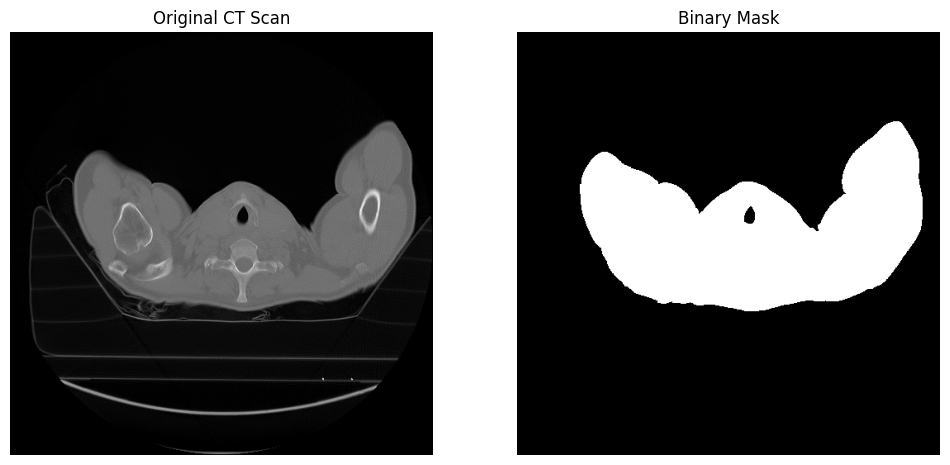

Binary mask saved at: binary_mask.png


In [ ]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import cv2

file_path = '/content/1-01.dcm'
dicom_data = pydicom.dcmread(file_path)

image = dicom_data.pixel_array

image = (image - np.min(image)) / (np.max(image) - np.min(image))
image = (image * 255).astype(np.uint8)

_, binary_mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


kernel = np.ones((5, 5), np.uint8)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

mask_save_path = 'binary_mask.png'
plt.imsave(mask_save_path, binary_mask, cmap='gray')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original CT Scan')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')
plt.axis('off')

plt.show()

print(f"Binary mask saved at: {mask_save_path}")


In [ ]:
pip install pyradiomics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 32.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

In [ ]:
pip install numpy SimpleITK pydicom opencv-python-headless


In [ ]:
!pip install SimpleITK

Now I have Extract feature of all dcm in folder

In [ ]:
pip install pydicom numpy opencv-python opencv-python-headless


In [ ]:
import os
import pydicom
import numpy as np
import cv2
import matplotlib.pyplot as plt

def create_binary_mask(image):

    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    image = (image * 255).astype(np.uint8)

    _, binary_mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kernel = np.ones((5, 5), np.uint8)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)
    binary_mask = (binary_mask > 0).astype(np.uint8)

    return binary_mask

def process_folder(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    dicom_files = [f for f in os.listdir(input_folder) if f.lower().endswith('.dcm')]

    for file_name in dicom_files:
        file_path = os.path.join(input_folder, file_name)

        dicom_data = pydicom.dcmread(file_path)
        image = dicom_data.pixel_array

        binary_mask = create_binary_mask(image)

        output_path = os.path.join(output_folder, f"{os.path.splitext(file_name)[0]}_mask.png")
        plt.imsave(output_path, binary_mask, cmap='gray')

        print(f"Processed and saved mask: {output_path}")


input_folder = '/content/drive/MyDrive/Dataset/Small Dcm Data/P1'
output_folder = '/content/drive/MyDrive/Dataset/Small Dcm Data/P1_mask'

process_folder(input_folder, output_folder)


Processed and saved mask: /content/drive/MyDrive/Dataset/Small Dcm Data/P1_mask/1-10_mask.png
Processed and saved mask: /content/drive/MyDrive/Dataset/Small Dcm Data/P1_mask/1-07_mask.png
Processed and saved mask: /content/drive/MyDrive/Dataset/Small Dcm Data/P1_mask/1-02_mask.png
Processed and saved mask: /content/drive/MyDrive/Dataset/Small Dcm Data/P1_mask/1-01_mask.png
Processed and saved mask: /content/drive/MyDrive/Dataset/Small Dcm Data/P1_mask/1-06_mask.png
Processed and saved mask: /content/drive/MyDrive/Dataset/Small Dcm Data/P1_mask/1-03_mask.png
Processed and saved mask: /content/drive/MyDrive/Dataset/Small Dcm Data/P1_mask/1-04_mask.png
Processed and saved mask: /content/drive/MyDrive/Dataset/Small Dcm Data/P1_mask/1-09_mask.png
Processed and saved mask: /content/drive/MyDrive/Dataset/Small Dcm Data/P1_mask/1-05_mask.png
Processed and saved mask: /content/drive/MyDrive/Dataset/Small Dcm Data/P1_mask/1-08_mask.png


In [ ]:
pip install numpy pandas pydicom SimpleITK pyradiomics


In [ ]:
import os
import pydicom
import SimpleITK as sitk
import numpy as np
import pandas as pd
import cv2
from radiomics import featureextractor

def load_dicom_image(file_path):
    dicom_data = pydicom.dcmread(file_path)
    image_array = dicom_data.pixel_array
    image = sitk.GetImageFromArray(image_array)
    return image

def load_mask_image(file_path):
    mask_array = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    mask_array = (mask_array > 0).astype(np.uint8)
    mask = sitk.GetImageFromArray(mask_array)
    return mask

def extract_features(image_path, mask_path, extractor):

    image = load_dicom_image(image_path)
    mask = load_mask_image(mask_path)

    features = extractor.execute(image, mask)
    return features

def process_folders(image_folder, mask_folder, output_csv):

    extractor = featureextractor.RadiomicsFeatureExtractor()

    feature_data = []

    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.dcm')]
    mask_files = [f for f in os.listdir(mask_folder) if f.lower().endswith('.png')]

    for image_file in image_files:
        base_name = os.path.splitext(image_file)[0]
        mask_file = f"{base_name}_mask.png"

        image_path = os.path.join(image_folder, image_file)
        mask_path = os.path.join(mask_folder, mask_file)

        if not os.path.exists(mask_path):
            print(f"Mask not found for image: {image_file}. Skipping...")
            continue

        print(f"Extracting features from {image_file} using {mask_file}...")
        features = extract_features(image_path, mask_path, extractor)

        feature_dict = {'Image': image_file, 'Mask': mask_file}
        feature_dict.update(features)
        feature_data.append(feature_dict)

    df = pd.DataFrame(feature_data)
    df.to_csv(output_csv, index=False)
    print(f"Radiomic features saved to {output_csv}")

image_folder = '/content/drive/MyDrive/Dataset/Small Dcm Data/P1'
mask_folder = '/content/drive/MyDrive/Dataset/Small Dcm Data/P1_mask'
output_csv = '/content/drive/MyDrive/Dataset/Small Dcm Data/radiomic_features.csv'

process_folders(image_folder, mask_folder, output_csv)


INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radi

Extracting features from 1-10.dcm using 1-10_mask.png...


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm


Extracting features from 1-07.dcm using 1-07_mask.png...


INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm


Extracting features from 1-02.dcm using 1-02_mask.png...


INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm


Extracting features from 1-01.dcm using 1-01_mask.png...


INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm


Extracting features from 1-06.dcm using 1-06_mask.png...


INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm


Extracting features from 1-03.dcm using 1-03_mask.png...


INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm


Extracting features from 1-04.dcm using 1-04_mask.png...


INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Extracting features from 1-09.dcm using 1-09_mask.png...


INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm


Extracting features from 1-05.dcm using 1-05_mask.png...


INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm


Extracting features from 1-08.dcm using 1-08_mask.png...


INFO:radiomics.featureextractor:Computing ngtdm


Radiomic features saved to /content/drive/MyDrive/Dataset/Small Dcm Data/radiomic_features.csv
